In [115]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [116]:
df = pd.read_csv('AirlineTweets.csv')

In [117]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [118]:
df = df[['airline_sentiment', 'text']].copy()

In [119]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<AxesSubplot:>

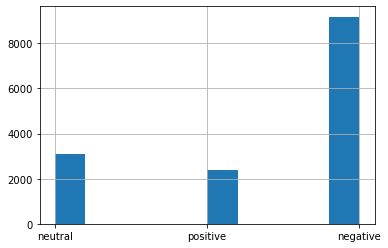

In [120]:
df['airline_sentiment'].hist()

In [121]:
target_map = {'positive':1, 'negative':0, 'neutral':2}
df['target'] = df['airline_sentiment'].map(target_map)

In [122]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [123]:
df_train, df_test = train_test_split(df)

In [124]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [125]:
vectorizer = TfidfVectorizer(max_features=2000)

In [126]:
Xtrain = vectorizer.fit_transform(df_test['text'])

In [127]:
Xtrain

<3660x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 53013 stored elements in Compressed Sparse Row format>

In [128]:
Xtest = vectorizer.transform(df_test['text'])

In [129]:
Xtest

<3660x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 53013 stored elements in Compressed Sparse Row format>

In [130]:
Ytrain = df_test['target']
Ytest = df_test['target']

In [131]:
model = LogisticRegression(max_iter=500)
model.fit(Xtrain, Ytrain)

print("Train acc:", model.score(Xtrain, Ytrain))
print("Test acc:", model.score(Xtest, Ytest))

Train acc: 0.8612021857923498
Test acc: 0.8612021857923498


In [132]:
Pr_train = model.predict_proba(Xtrain)
Pr_test = model.predict_proba(Xtest)

print("Train AUC:", roc_auc_score(Ytrain, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Ytest, Pr_test, multi_class='ovo'))

Train AUC: 0.9600499829286893
Test AUC: 0.9600499829286893


In [133]:
P_train = model.predict(Xtrain)
P_test = model.predict(Xtest)

In [134]:
cm = confusion_matrix(Ytrain, P_train, normalize='true')
cm

array([[0.97992143, 0.00436491, 0.01571366],
       [0.2302521 , 0.71764706, 0.05210084],
       [0.34883721, 0.03100775, 0.62015504]])

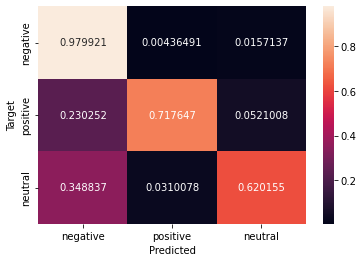

In [135]:
def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
plot_cm(cm)

In [136]:
cm_test = confusion_matrix(Ytest, P_test, normalize='true')
cm_test

array([[0.97992143, 0.00436491, 0.01571366],
       [0.2302521 , 0.71764706, 0.05210084],
       [0.34883721, 0.03100775, 0.62015504]])

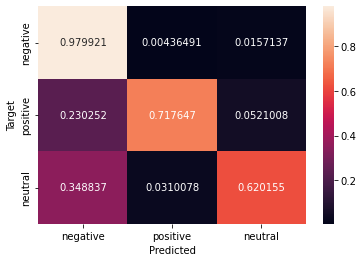

In [137]:
plot_cm(cm_test)

# Binary Labels & Model Interpretation

In [138]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [139]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [140]:
Xtrain = vectorizer.fit_transform(df_test['text'])
Xtest = vectorizer.transform(df_test['text'])

In [141]:
Ytrain = df_test['target']
Ytest = df_test['target']

In [142]:
model = LogisticRegression(max_iter=500)
model.fit(Xtrain, Ytrain)

print("Train acc:", model.score(Xtrain, Ytrain))
print("Test acc:", model.score(Xtest, Ytest))

Train acc: 0.8612021857923498
Test acc: 0.8612021857923498


In [143]:
Pr_train = model.predict_proba(Xtrain)
Pr_test = model.predict_proba(Xtest)

print("Train AUC:", roc_auc_score(Ytrain, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Ytest, Pr_test, multi_class='ovo'))

Train AUC: 0.9600499829286893
Test AUC: 0.9600499829286893


In [144]:
model.coef_

array([[ 0.25594488, -0.32066244,  0.10459708, ..., -0.04356436,
         0.23073524,  0.18165165],
       [-0.10516613,  0.67677695, -0.04058631, ...,  0.19047705,
        -0.04961622, -0.03751454],
       [-0.15077875, -0.35611451, -0.06401077, ..., -0.14691268,
        -0.18111902, -0.14413711]])

(array([  2.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   1.,   3.,
          4.,   8.,  25.,  76., 157., 303., 427., 472., 286., 103.,  61.,
         29.,  17.,   8.,   2.,   4.,   3.,   0.,   5.]),
 array([-3.23254417, -3.04921594, -2.86588771, -2.68255949, -2.49923126,
        -2.31590303, -2.1325748 , -1.94924658, -1.76591835, -1.58259012,
        -1.3992619 , -1.21593367, -1.03260544, -0.84927721, -0.66594899,
        -0.48262076, -0.29929253, -0.1159643 ,  0.06736392,  0.25069215,
         0.43402038,  0.6173486 ,  0.80067683,  0.98400506,  1.16733329,
         1.35066151,  1.53398974,  1.71731797,  1.90064619,  2.08397442,
         2.26730265]),
 <BarContainer object of 30 artists>)

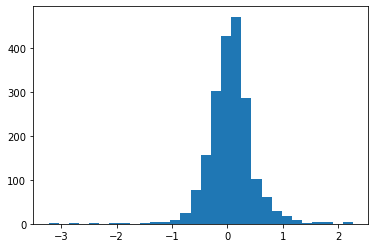

In [145]:
plt.hist(model.coef_[0], bins=30)

In [146]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'jetblue': 984,
 'll': 1059,
 'pass': 1300,
 'along': 132,
 'the': 1730,
 'advice': 96,
 'you': 1993,
 'guys': 830,
 'rock': 1504,
 'united': 1847,
 'sent': 1565,
 'dm': 563,
 'with': 1948,
 'my': 1191,
 'file': 702,
 'reference': 1448,
 'number': 1236,
 'just': 991,
 'want': 1895,
 'to': 1763,
 'know': 1003,
 'if': 931,
 'someone': 1630,
 'has': 854,
 'located': 1063,
 'bag': 230,
 'even': 628,
 'it': 975,
 'not': 1224,
 'here': 882,
 'yet': 1992,
 'southwestair': 1641,
 'black': 275,
 'is': 969,
 'really': 1435,
 'sweet': 1699,
 'well': 1921,
 'done': 575,
 'why': 1938,
 'am': 140,
 'still': 1669,
 'in': 939,
 'delta': 525,
 'doing': 570,
 'around': 180,
 'us': 1861,
 'and': 149,
 'about': 70,
 'ridiculous': 1495,
 'sea': 1547,
 'den': 526,
 'south': 1639,
 'team': 1713,
 'on': 1260,
 'its': 979,
 'way': 1908,
 'http': 911,
 'co': 405,
 'one': 1263,
 'of': 1244,
 'your': 1994,
 'workers': 1961,
 'refused': 1452,
 'give': 804,
 'me': 1123,
 'her': 881,
 'name': 1193,
 'as': 188,
 'fo

In [149]:
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
not 2.2034077552890143
hours 2.267302649461502
no 2.2656977437096466
delayed 2.194977700601162
hold 2.0854700346830537


In [150]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > -threshold:
        print(word, weight)

Most negative words:
ll -0.20466184153498196
pass -0.7572579017228305
along 0.18811120870255674
the 0.18753180857915855
advice 0.1620995109901858
you -0.003604997013405392
guys 0.15891147076015694
rock -0.45157531802574413
united -0.544327431050464
sent -0.14446597127641989
dm -0.9206227441815878
with 0.23383406120507028
my 0.9641756379116031
file 0.4040351919553488
reference 0.034862012393253275
number -0.37403809829731977
just 0.04974121784706169
want 0.2819079942810476
to 0.4422754299677654
know -0.508968649162043
if -0.10291710086381671
someone 0.9290219216118633
has 0.7705963164759365
located -0.12213211340605581
bag 1.4451644210139278
even 0.5455223920992484
it -0.7509083969446791
not 2.2034077552890143
here 0.1410300710881707
yet -0.07334978402890126
black -0.1374237641011139
is 0.635232281656905
really 0.5052816592806871
sweet -0.4814838943402845
well -0.3184869352641542
done -0.8119660708584578
why 1.7493018286323692
am -0.10080717845229402
still 1.126019202592848
in -0.009209

using 0.008021700879221454
imagine -0.5129799703793211
contest -0.18080508040829218
luv -0.5561822599848192
app 0.5591631019765472
either -0.29511730812410103
troubling 0.3095766697166057
think 0.3233957795658935
nashville -0.549271928661138
wouldn -0.05536926030799362
real 0.4697222876974844
awesome -1.3057324653241154
frustrating 0.6272472987353988
dunno 0.03537752758396076
flightly -0.28624239180391325
flew 0.05880313418501512
into -0.08609551724106587
main 0.25389450757934695
terminal 0.1762951407210893
members 0.1631173595510969
keeping -0.7290884074152449
watch 0.15471825867289246
avgeek -0.49413676535599566
thx -0.6933369602874027
taking -0.20905224555198884
flightling 0.2845267471684855
2nd 0.05717357997443971
top -0.08747307471158283
piece 0.06726380147335989
rate 0.4040111393108907
lady -1.0442501010259486
12 -0.1702503852180864
wont 0.11704624679073614
anything 0.6395000752124228
boarding -0.2291067047595888
captain 0.04693453879194367
turned 0.12442074249168662
incredible -

charged 0.023369601960058647
merged -0.12857755387217412
rescheduled -0.07297369598202577
party 0.1442171720828012
750 0.09129047080261782
roads 0.16047538746332093
anxious 0.08759148736838218
post 0.19978492622300292
albuquerque -0.2517261936499623
usa -0.2538301858522702
story -0.206352522980827
double -0.09323938916874316
triple 0.24608005452230938
infant 0.12176023825591509
answered -0.025414253653555888
must -0.24217618564523838
handled 0.2592811721618826
tkt 0.2337025068261762
svc 0.21010623807667847
poorservice 0.18666685435847438
ripped 0.3130765573693504
000 -0.3206624378803838
400 0.16514134579670986
reimbursement 0.2587932324815312
45min -0.13089847709074562
30pm -0.07481205806143694
resolve 0.20339278566017063
grandma -0.14459373474251314
eastern 0.10829206846138113
waive 0.29722361620659055
ripoff 0.20457916922364575
regular -0.03345078759257537
unhelpful 0.17672154612146945
bumped 0.11888207774378301
view 0.052362739150619675
count 0.06853587604516789
earned 0.05422343273